### Bio profiles - Oxygen budget

In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cmocean.cm as cm
import matplotlib.patches as mpatches
import datetime as dt

import plotly
from IPython.display import display, HTML
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
import copy

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

In [2]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('burlywood')
mycmap2 = copy.copy(cm.balance)
mycmap2.set_bad('burlywood')

In [3]:
bathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202310b.nc')
with xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202310b.nc') as bathym:
    bath = bathym.Bathymetry
with xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy
    long = mesh.nav_lon
    latg = mesh.nav_lat
    depth = mesh.gdept_0
grid_dir = Path("/ocean/atall/MOAD/grid/")
grid_map = Path("grid_from_lat_lon_mask999.nc")
grid_lons_lats = xr.open_dataset(grid_dir / grid_map)
thalweg = np.loadtxt('/ocean/atall/MOAD/analysis-abdoul/thalweg_files/thalweg_working.txt', delimiter=' ', dtype=int)

In [4]:
dir='/ocean/atall/MOAD/Model/month-avg.202410/'
ds_chem= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_chem_T_201*', concat_dim="month", combine="nested",
                data_vars='minimal', coords='minimal', compat='override', autoclose=True, parallel=True)
ds_chem_clim = ds_chem.groupby(ds_chem.month).mean(dim='month')
ds_biol= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_biol_T_201*', concat_dim="month", combine="nested",
                data_vars='minimal', coords='minimal', compat='override', autoclose=True, parallel=True)
ds_biol_clim = ds_biol.groupby(ds_chem.month).mean(dim='month')
ds_grdT= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_grid_T_201*', concat_dim="month", combine="nested",
                data_vars='minimal', coords='minimal', compat='override', autoclose=True, parallel=True)
ds_grdT_clim = ds_grdT.groupby(ds_grdT.month).mean(dim='month')
ds_diag= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_diag_T_201*', concat_dim="month", combine="nested",
                data_vars='minimal', coords='minimal', compat='override', autoclose=True, parallel=True) 
ds_diag_clim = ds_diag.groupby(ds_diag.month).mean(dim='month')
ds_dbio= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_diagbio_T_201*', concat_dim="month", combine="nested",
                data_vars='minimal', coords='minimal', compat='override', autoclose=True, parallel=True) 
ds_dbio_clim = ds_dbio.groupby(ds_dbio.month).mean(dim='month')

/home/atall/conda_envs/analysis-abdoul/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning:

Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]

/home/atall/conda_envs/analysis-abdoul/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning:

Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]

/home/atall/conda_envs/analysis-abdo

In [5]:
tmask2 = tmask.assign_coords(x=("x", ds_chem_clim.dissolved_oxygen.gridX.data), y=("y", ds_chem_clim.dissolved_oxygen.gridY.data), z=("z", ds_chem_clim.dissolved_oxygen.depth.data))
mbathy2 = mbathy.assign_coords(x=("x", ds_chem_clim.dissolved_oxygen.gridX.data), y=("y", ds_chem_clim.dissolved_oxygen.gridY.data))
depth2 = depth.assign_coords(x=("x", ds_chem_clim.dissolved_oxygen.gridX.data), y=("y", ds_chem_clim.dissolved_oxygen.gridY.data))
bathy2 = bath.assign_coords(x=("x", ds_chem_clim.dissolved_oxygen.gridX.data), y=("y", ds_chem_clim.dissolved_oxygen.gridY.data))
tmask2 = tmask2.rename({"y": "gridY"})
tmask2 = tmask2.rename({"x": "gridX"})
tmask2 = tmask2.rename({"z": "depth"})
mbathy2=mbathy2.rename({"y": "gridY"})
mbathy2=mbathy2.rename({"x": "gridX"})
depth2=depth2.rename({"y": "gridY"})
depth2=depth2.rename({"x": "gridX"})
bathy2=bathy2.rename({"y": "gridY"})
bathy2=bathy2.rename({"x": "gridX"})
depth2

<xarray.DataArray 'gdept_0' (t: 1, z: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=float32]
Coordinates:
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
Dimensions without coordinates: t, z
Attributes:
    standard_name:  gdept_0
    long_name:      depth of T-grid points
    units:          m
    positive:       down

In [6]:
ia1,ia2,ja1,ja2 = 25,125,250,425 # JdF
ib1,ib2,jb1,jb2 = 200,300,450,550 # Central SoG
ic1,ic2,jc1,jc2 = 100,200,650,730 # Northern SoG
i1, i2 = list([ia1,ib1,ic1]),list([ia2,ib2,ic2])
j1, j2 = list([ja1,jb1,jc1]),list([ja2,jb2,jc2])
regions = list(['Juan de Fuca','Central SoG','Northern SoG'])
for k in range(len(regions)): 
    print('Bathy ('f'{regions[k]}'') = ',np.max(bathy2[j1[k]:j2[k], i1[k]:i2[k]]),'m')

Bathy (Juan de Fuca) =  <xarray.DataArray 'Bathymetry' ()>
array(249.3125) m
Bathy (Central SoG) =  <xarray.DataArray 'Bathymetry' ()>
array(428.) m
Bathy (Northern SoG) =  <xarray.DataArray 'Bathymetry' ()>
array(428.) m


#### Interaanual variability

/tmp/ipykernel_3175071/2416760160.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_3175071/2416760160.py:31: RuntimeWarn

Text(0.5, 0.98, 'Juan de Fuca')

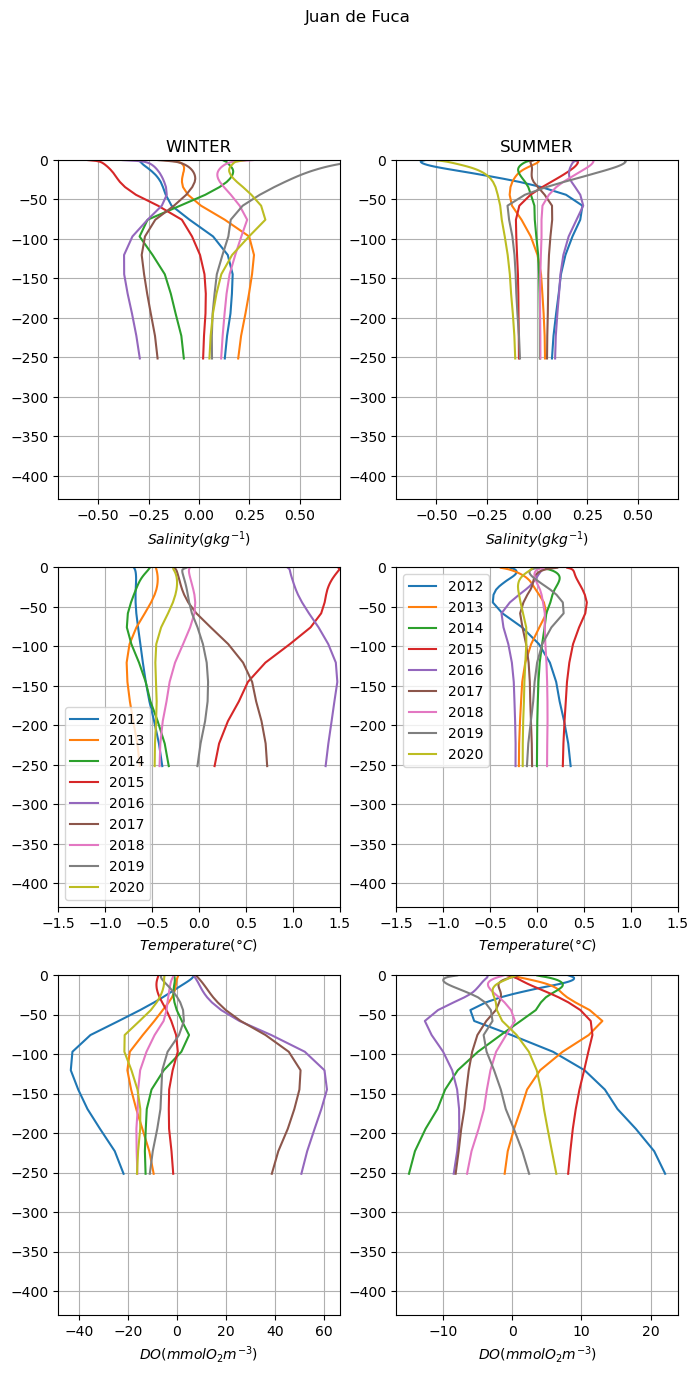

In [ ]:
k, col, nyear = (0, 2, 9)
kk = np.array(np.max(mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]))
depths = depth2[0,:kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)

fig, ax = plt.subplots(3, col, figsize=(8, 15))
for j in range(col):
    if j==0:
        ti,te=(0,3)
        title='WINTER'
    else:
        ti,te=(6,9)
        title='SUMMER'
    for i in range (nyear):
        if i==0:
            year=2012
        else:
            year=year+1
        ds_chemY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_chem_T_{year-1}1201_{year}1130.nc')
        ds_grdTY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_grid_T_{year-1}1201_{year}1130.nc')
        ds_diagY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_diag_T_{year-1}1201_{year}1130.nc')
        sal=ds_grdTY.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_grdT_clim.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        sal = np.where(sal==0, np.nan, sal)
        labelS='$Salinity (gkg^{-1})$'
        tem=ds_grdTY.votemper[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_grdT_clim.votemper[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        tem = np.where(tem==0, np.nan, tem)
        labelT='$Temperature (°C)$'
        oxy=ds_chemY.dissolved_oxygen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_chem_clim.dissolved_oxygen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        oxy = np.where(oxy==0, np.nan, oxy)
        labelO='$DO (mmolO_2m^{-3})$'

        ax[0,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(sal[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[1,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(tem[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[2,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(oxy[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[0,j].set_xlim(-0.7,0.7)
        ax[1,j].set_xlim(-1.5,1.5)
        #ax[2,j].set_xlim(-30,30)
        ax[0,j].set_ylim(-430,0)
        ax[1,j].set_ylim(-430,0)
        ax[2,j].set_ylim(-430,0)
        ax[0,j].set_xlabel(f'{labelS}')
        ax[1,j].set_xlabel(f'{labelT}')
        ax[2,j].set_xlabel(f'{labelO}')
        ax[0,j].set_title(title)
        ax[0,j].legend()
        ax[1,j].legend()
        ax[2,j].legend()
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[2,0].grid()
ax[2,1].grid()
fig.suptitle('Juan de Fuca')

/tmp/ipykernel_2893063/2872466361.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2872466361.py:31: RuntimeWarn

Text(0.5, 0.98, 'Central SoG')

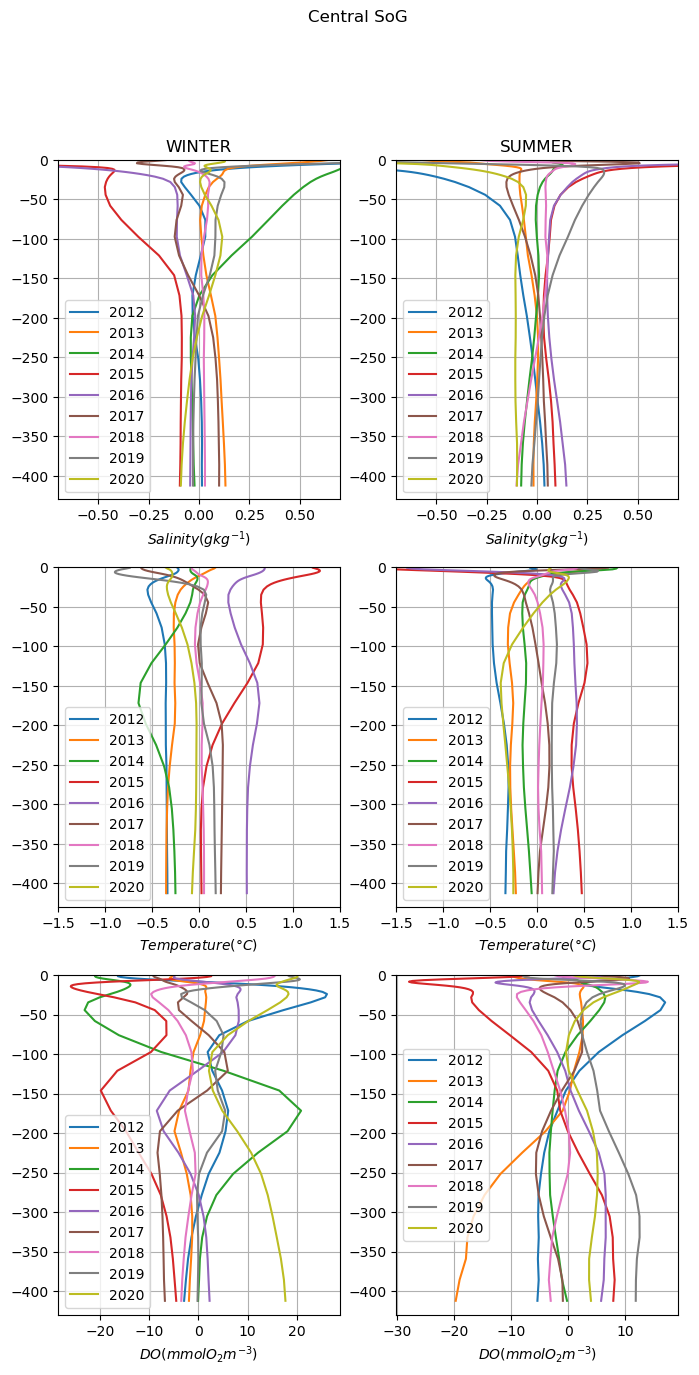

In [ ]:
k, col, nyear = (1, 2, 9)
kk = np.array(np.max(mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]))
depths = depth2[0,:kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)

fig, ax = plt.subplots(3, col, figsize=(8, 15))
for j in range(col):
    if j==0:
        ti,te=(0,3)
        title='WINTER'
    else:
        ti,te=(6,9)
        title='SUMMER'
    for i in range (nyear):
        if i==0:
            year=2012
        else:
            year=year+1
        ds_chemY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_chem_T_{year-1}1201_{year}1130.nc')
        ds_grdTY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_grid_T_{year-1}1201_{year}1130.nc')
        ds_diagY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_diag_T_{year-1}1201_{year}1130.nc')
        sal=ds_grdTY.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_grdT_clim.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        sal = np.where(sal==0, np.nan, sal)
        labelS='$Salinity (gkg^{-1})$'
        tem=ds_grdTY.votemper[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_grdT_clim.votemper[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        tem = np.where(tem==0, np.nan, tem)
        labelT='$Temperature (°C)$'
        oxy=ds_chemY.dissolved_oxygen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_chem_clim.dissolved_oxygen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        oxy = np.where(oxy==0, np.nan, oxy)
        labelO='$DO (mmolO_2m^{-3})$'

        ax[0,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(sal[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[1,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(tem[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[2,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(oxy[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[0,j].set_xlim(-0.7,0.7)
        ax[1,j].set_xlim(-1.5,1.5)
        #ax[2,j].set_xlim(-30,30)
        ax[0,j].set_ylim(-430,0)
        ax[1,j].set_ylim(-430,0)
        ax[2,j].set_ylim(-430,0)
        ax[0,j].set_xlabel(f'{labelS}')
        ax[1,j].set_xlabel(f'{labelT}')
        ax[2,j].set_xlabel(f'{labelO}')
        ax[0,j].set_title(title)
        ax[0,j].legend()
        ax[1,j].legend()
        ax[2,j].legend()
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[2,0].grid()
ax[2,1].grid()
fig.suptitle('Central SoG')

/tmp/ipykernel_2893063/3256748581.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:31: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:33: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:35: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/3256748581.py:31: RuntimeWarn

Text(0.5, 0.98, 'Northern SoG')

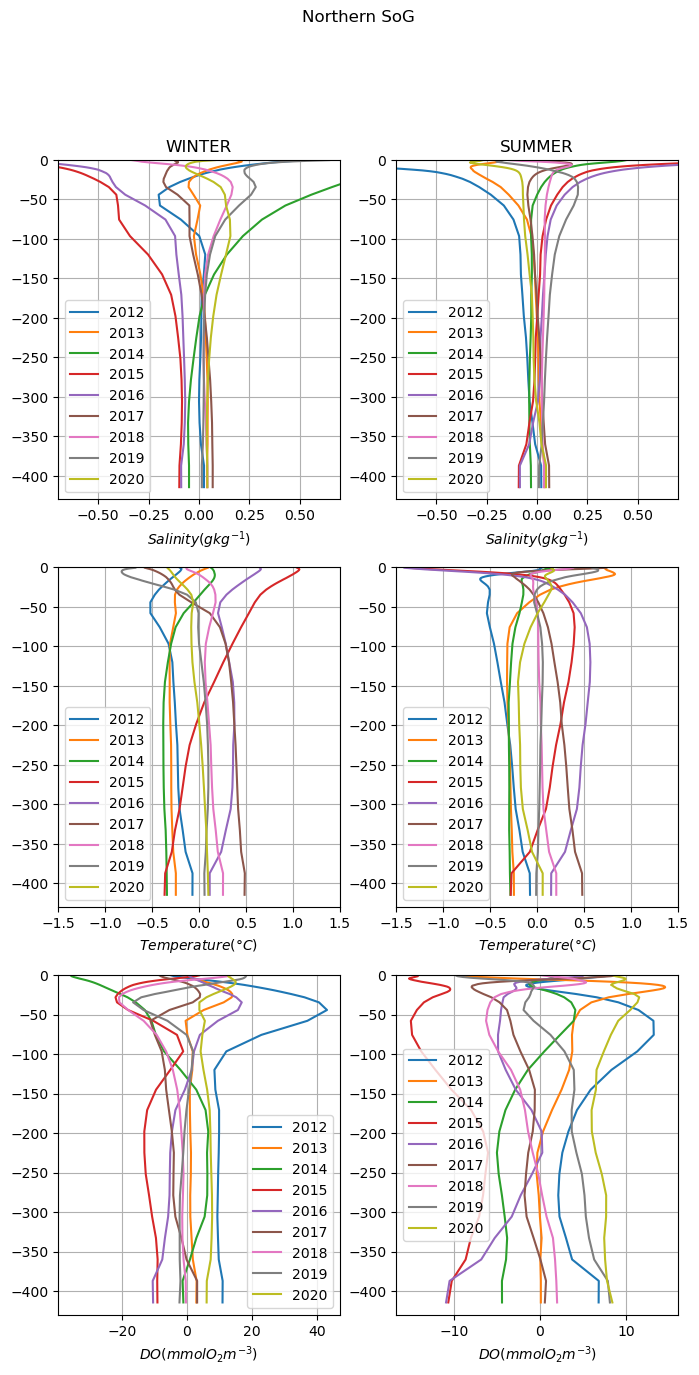

In [9]:
k, col, nyear = (2, 2, 9)
kk = np.array(np.max(mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]))
depths = depth2[0,:kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)

fig, ax = plt.subplots(3, col, figsize=(8, 15))
for j in range(col):
    if j==0:
        ti,te=(0,3)
        title='WINTER'
    else:
        ti,te=(6,9)
        title='SUMMER'
    for i in range (nyear):
        if i==0:
            year=2012
        else:
            year=year+1
        ds_chemY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_chem_T_{year-1}1201_{year}1130.nc')
        ds_grdTY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_grid_T_{year-1}1201_{year}1130.nc')
        ds_diagY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_diag_T_{year-1}1201_{year}1130.nc')
        sal=ds_grdTY.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_grdT_clim.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        sal = np.where(sal==0, np.nan, sal)
        labelS='$Salinity (gkg^{-1})$'
        tem=ds_grdTY.votemper[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_grdT_clim.votemper[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        tem = np.where(tem==0, np.nan, tem)
        labelT='$Temperature (°C)$'
        oxy=ds_chemY.dissolved_oxygen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_chem_clim.dissolved_oxygen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        oxy = np.where(oxy==0, np.nan, oxy)
        labelO='$DO (mmolO_2m^{-3})$'

        ax[0,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(sal[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[1,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(tem[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[2,j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(oxy[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
        ax[0,j].set_xlim(-0.7,0.7)
        ax[1,j].set_xlim(-1.5,1.5)
        #ax[2,j].set_xlim(-30,30)
        ax[0,j].set_ylim(-430,0)
        ax[1,j].set_ylim(-430,0)
        ax[2,j].set_ylim(-430,0)
        ax[0,j].set_xlabel(f'{labelS}')
        ax[1,j].set_xlabel(f'{labelT}')
        ax[2,j].set_xlabel(f'{labelO}')
        ax[0,j].set_title(title)
        ax[0,j].legend()
        ax[1,j].legend()
        ax[2,j].legend()
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[2,0].grid()
ax[2,1].grid()
fig.suptitle('Northern SoG')

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_2893063/2585090220.py:22: RuntimeWarn

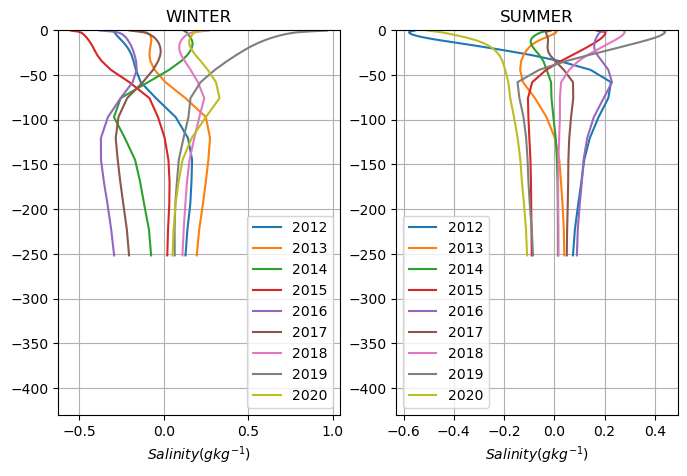

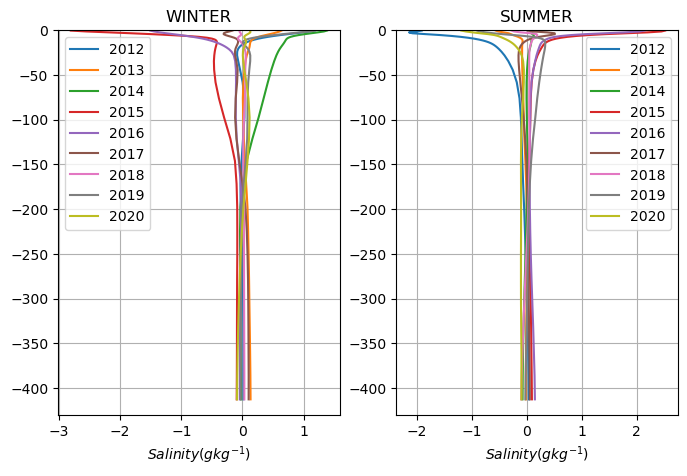

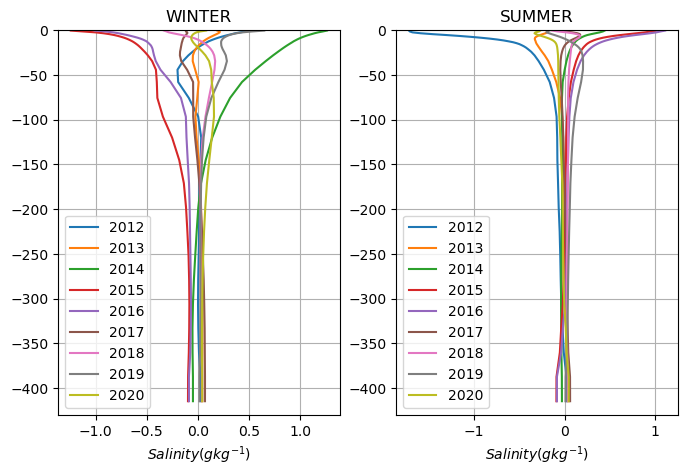

In [11]:
col, nyear = (2, 9)
for k in range (3):
    kk = np.array(np.max(mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]))
    depths = depth2[0,:kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
    fig, ax = plt.subplots(1, col, figsize=(8, 5))
    for i in range (nyear):
        if i==0:
            year=2012
        else:
            year=year+1
        ds_grdTY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_grid_T_{year-1}1201_{year}1130.nc')
        var=ds_grdTY.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_grdT_clim.vosaline[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        label='$Salinity (gkg^{-1})$'
        for j in range(col):
            if j==0:
                ti,te=(1,3)
                title='WINTER'
            else:
                ti,te=(7,9)
                title='SUMMER'
            var = np.where(var==0, np.nan, var)
            ax[j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(var[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
            #ax[k].set_xlim(-0.25,0.25)
            ax[j].set_ylim(-430,0)
            ax[j].set_xlabel(f'{label}')
            ax[j].set_title(title)
            ax[j].legend()
    ax[0].grid()
    ax[1].grid()


/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/1429064361.py:22: RuntimeWarning:

Mean of

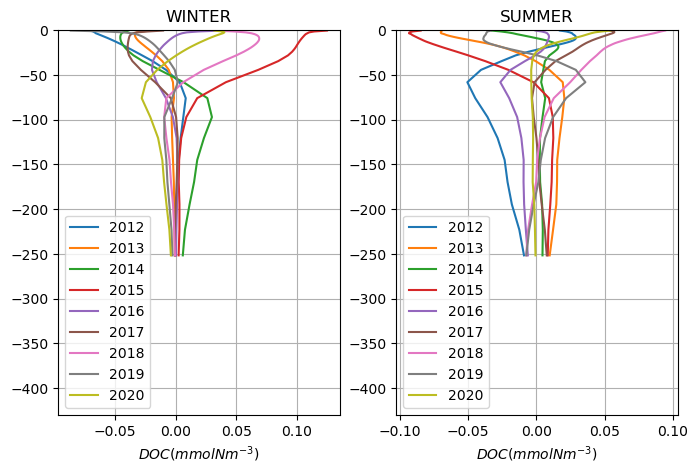

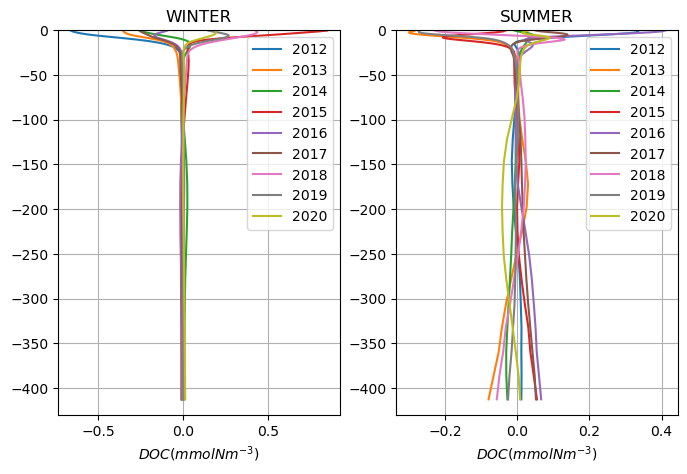

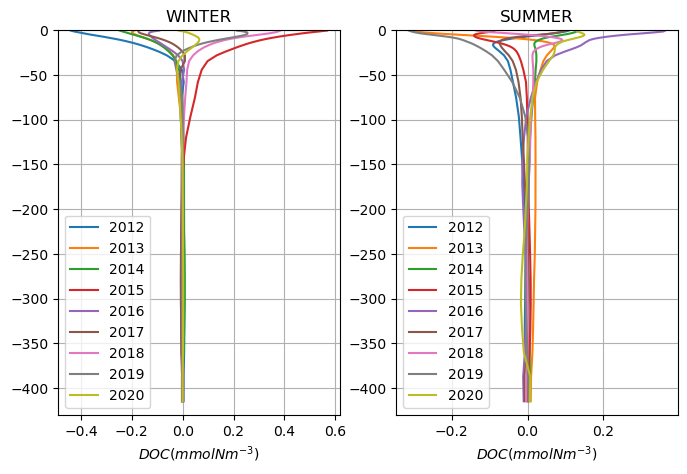

In [14]:
col, nyear = (2, 9)
for k in range (3):
    kk = np.array(np.max(mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]))
    depths = depth2[0,:kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
    fig, ax = plt.subplots(1, col, figsize=(8, 5))
    for i in range (nyear):
        if i==0:
            year=2012
        else:
            year=year+1
        ds_biolY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_biol_T_{year-1}1201_{year}1130.nc')
        var=ds_biolY.dissolved_organic_nitrogen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_biol_clim.dissolved_organic_nitrogen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        label='$DON (mmolNm^{-3})$'
        for j in range(col):
            if j==0:
                ti,te=(1,3)
                title='WINTER'
            else:
                ti,te=(7,9)
                title='SUMMER'
            var = np.where(var==0, np.nan, var)
            ax[j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(var[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
            #ax[k].set_xlim(-0.25,0.25)
            ax[j].set_ylim(-430,0)
            ax[j].set_xlabel(f'{label}')
            ax[j].set_title(title)
            ax[j].legend()
    ax[0].grid()
    ax[1].grid()


/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_122064/323094728.py:22: RuntimeWarning:

Mean of empty slice


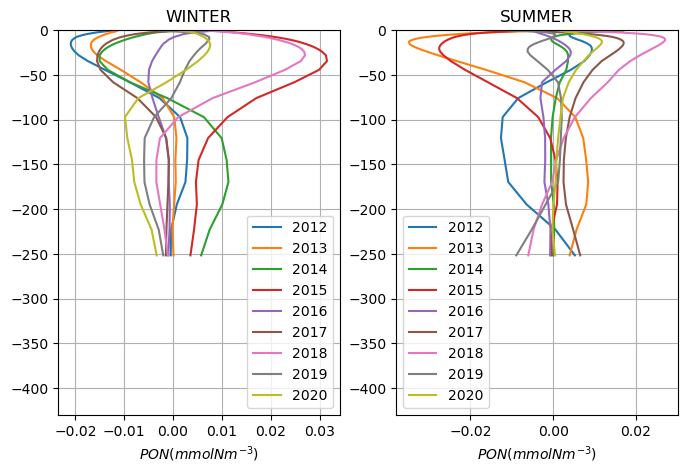

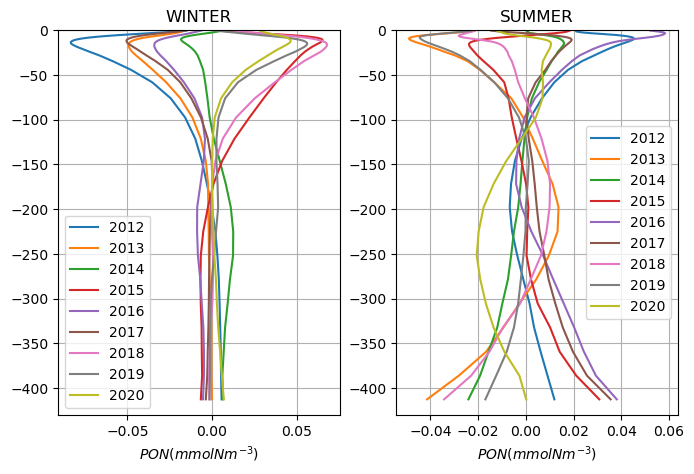

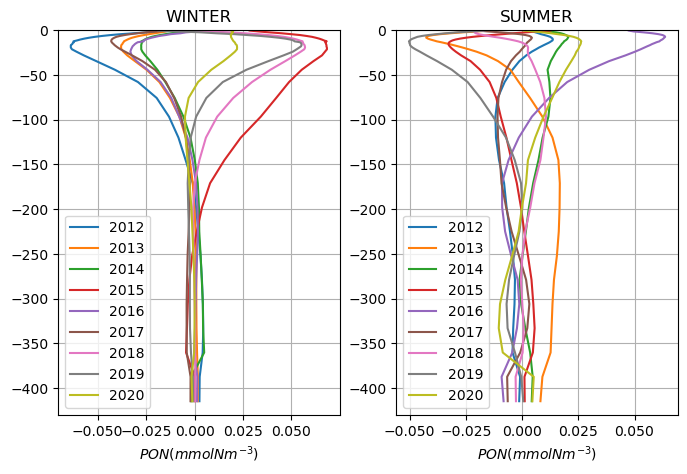

In [15]:
col, nyear = (2, 9)
for k in range (3):
    kk = np.array(np.max(mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]))
    depths = depth2[0,:kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
    fig, ax = plt.subplots(1, col, figsize=(8, 5))
    for i in range (nyear):
        if i==0:
            year=2012
        else:
            year=year+1
        ds_biolY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_biol_T_{year-1}1201_{year}1130.nc')
        var=ds_biolY.particulate_organic_nitrogen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)-ds_biol_clim.particulate_organic_nitrogen[:, :kk, j1[k]:j2[k], i1[k]:i2[k]].where(tmask2[0, mbathy2[0, j1[k]:j2[k], i1[k]:i2[k]]-1, j1[k]:j2[k], i1[k]:i2[k]]==1)
        label='$PON (mmolNm^{-3})$'
        for j in range(col):
            if j==0:
                ti,te=(1,3)
                title='WINTER'
            else:
                ti,te=(7,9)
                title='SUMMER'
            var = np.where(var==0, np.nan, var)
            ax[j].plot(np.array(np.nanmean(np.nanmean(np.nanmean(var[ti:te],axis=2),axis=2),axis=0)),
                    -np.mean(np.mean(depths,axis=1),axis=1), label=year)
            #ax[k].set_xlim(-0.25,0.25)
            ax[j].set_ylim(-430,0)
            ax[j].set_xlabel(f'{label}')
            ax[j].set_title(title)
            ax[j].legend()
    ax[0].grid()
    ax[1].grid()


#### Interannual variability along the thalweg

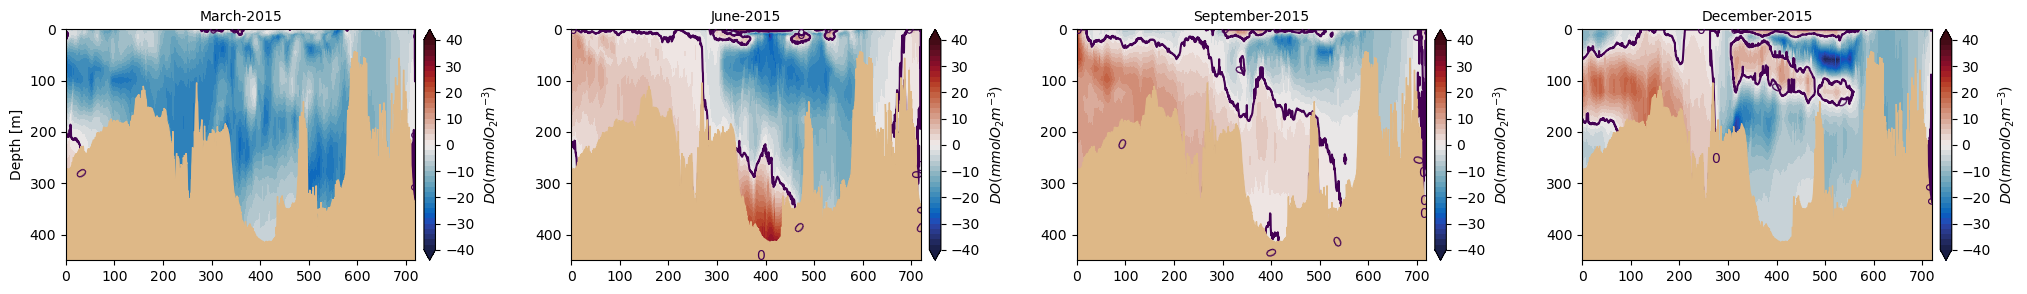

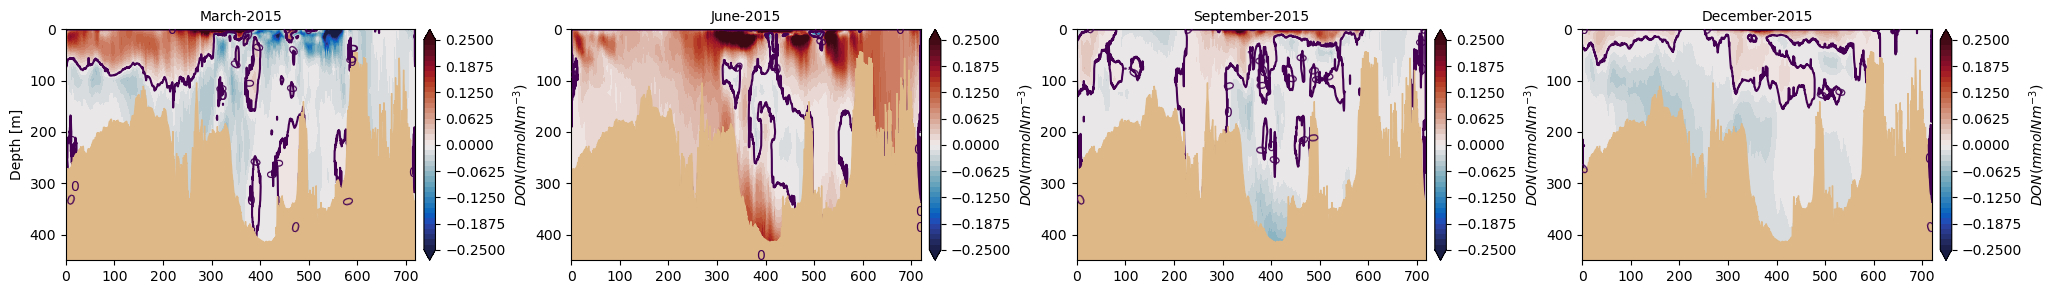

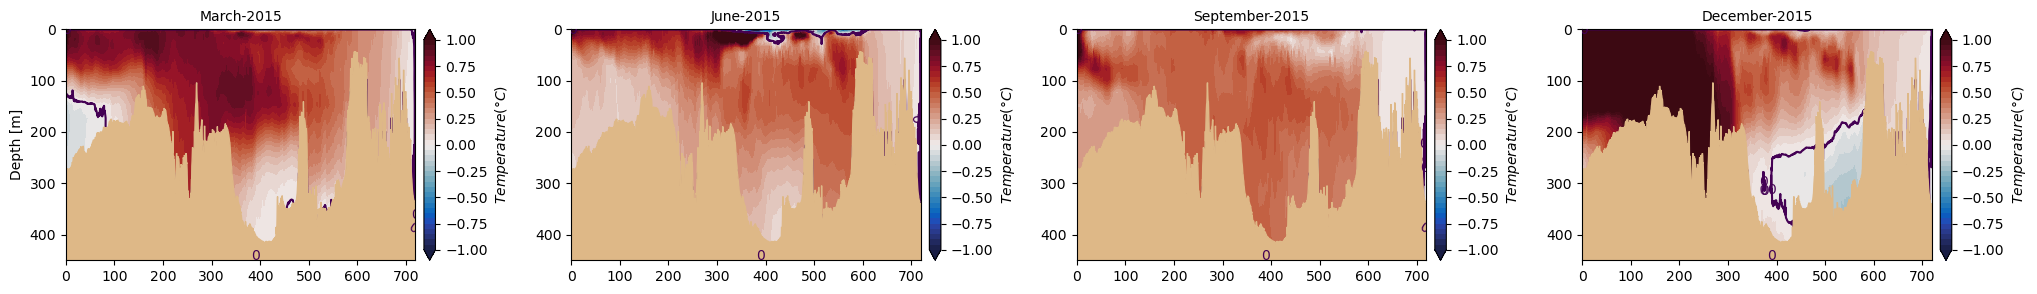

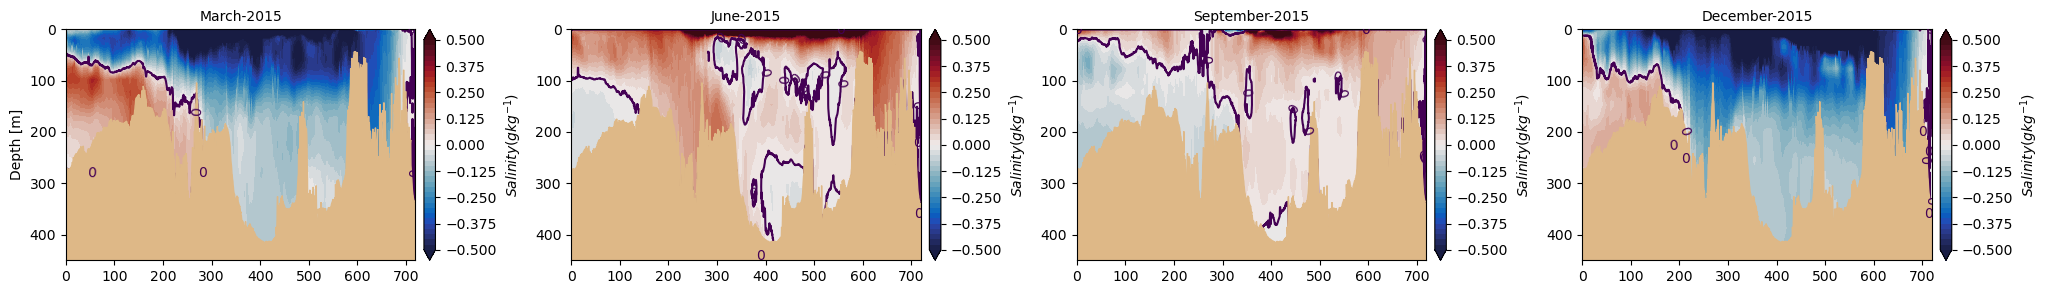

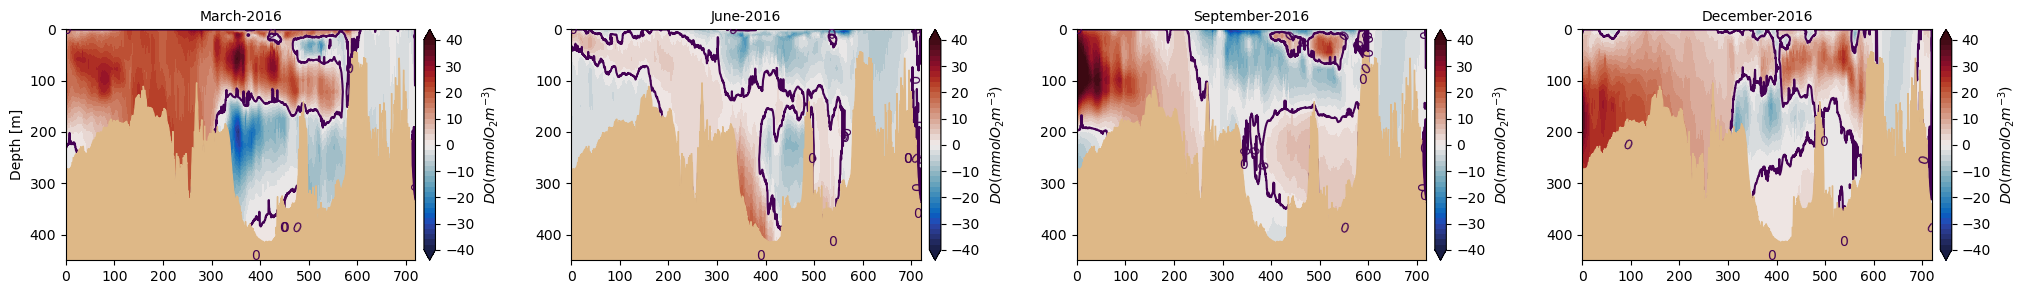

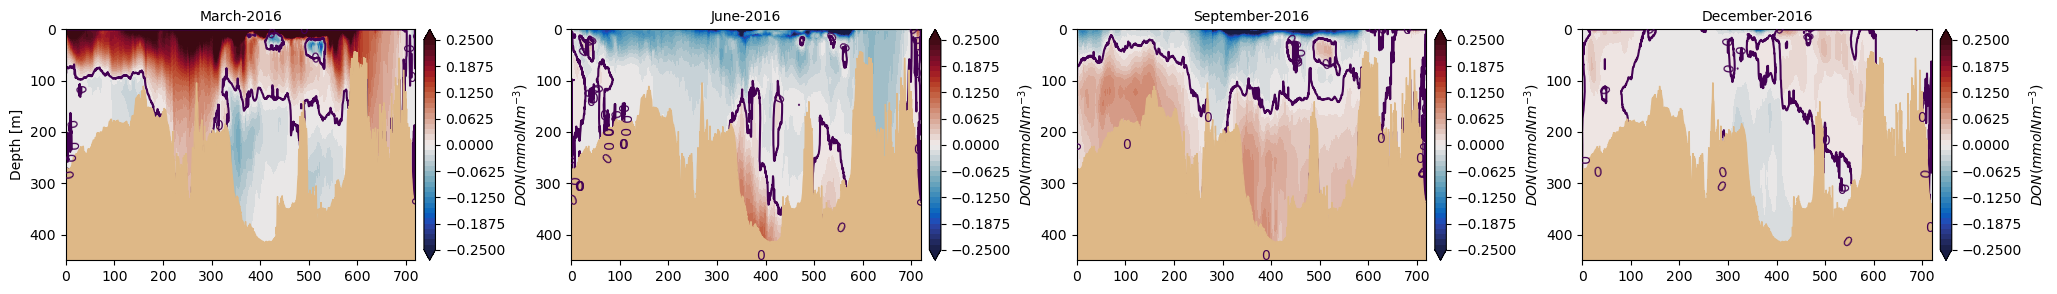

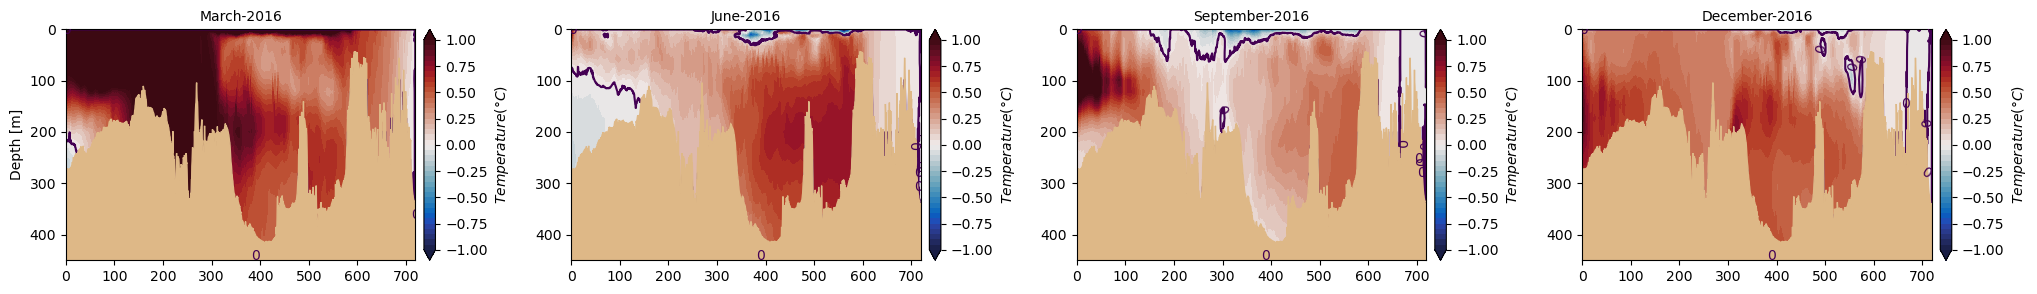

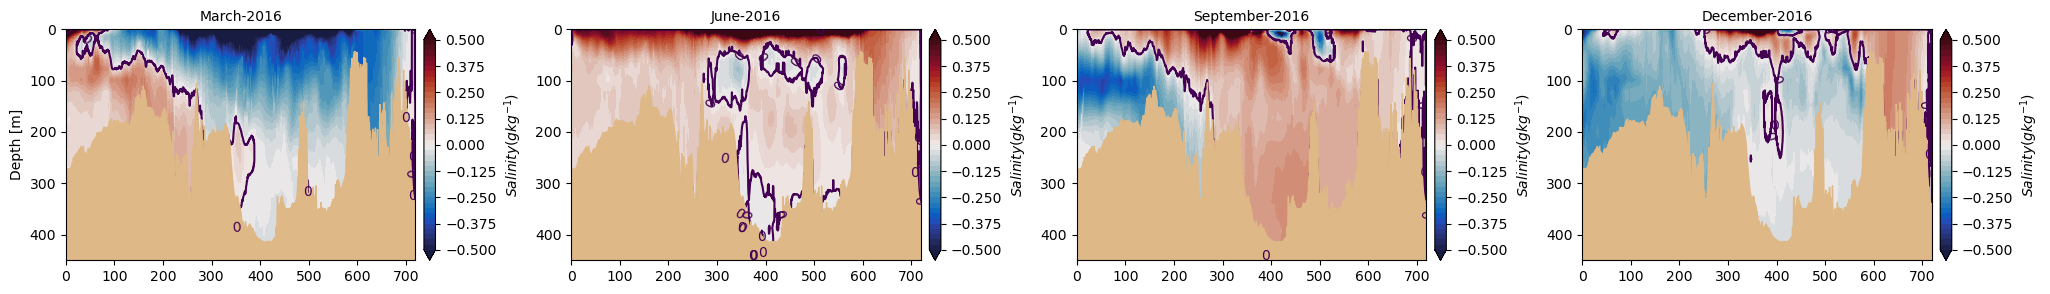

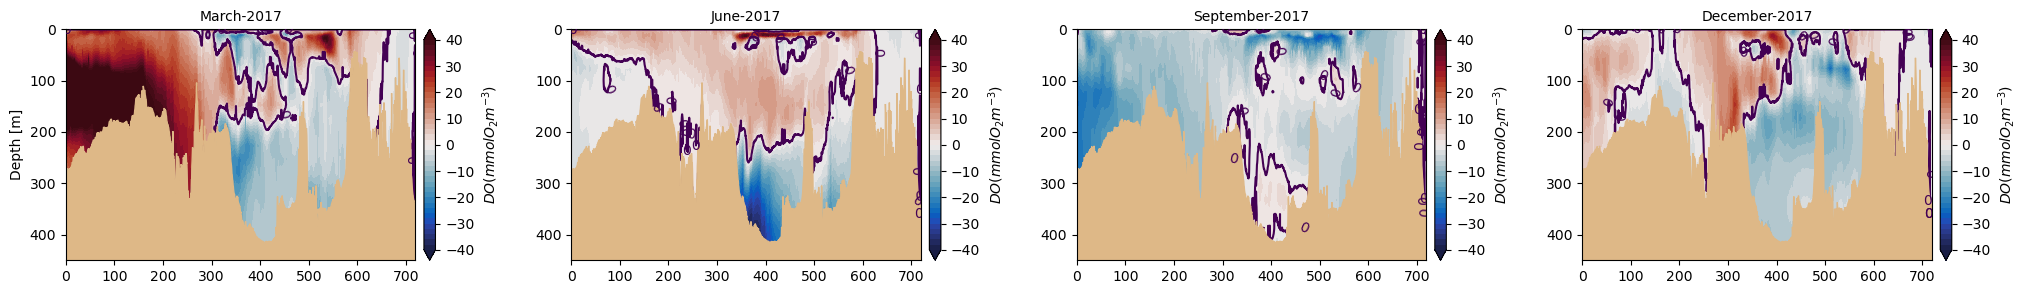

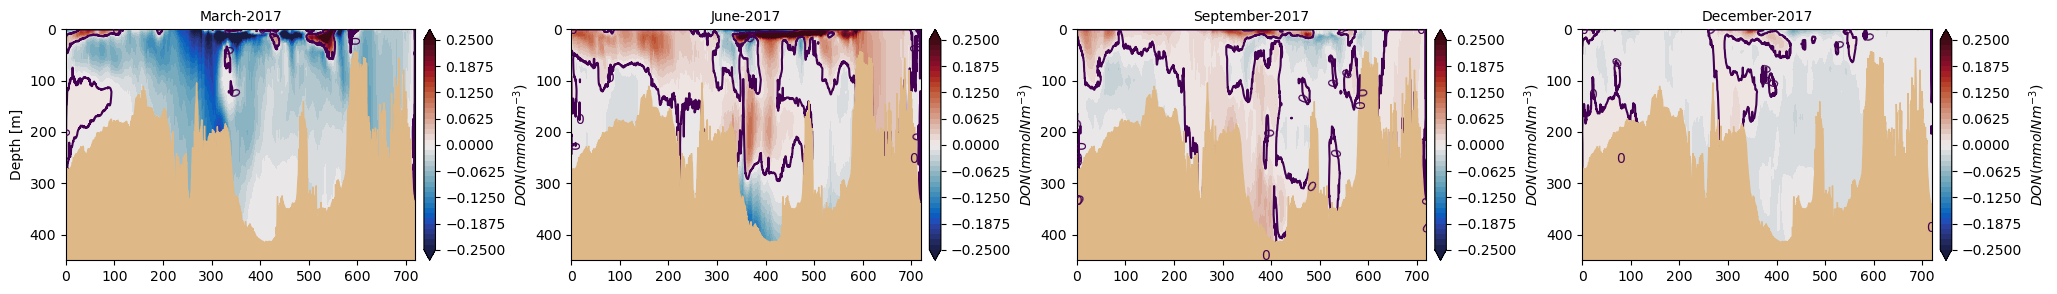

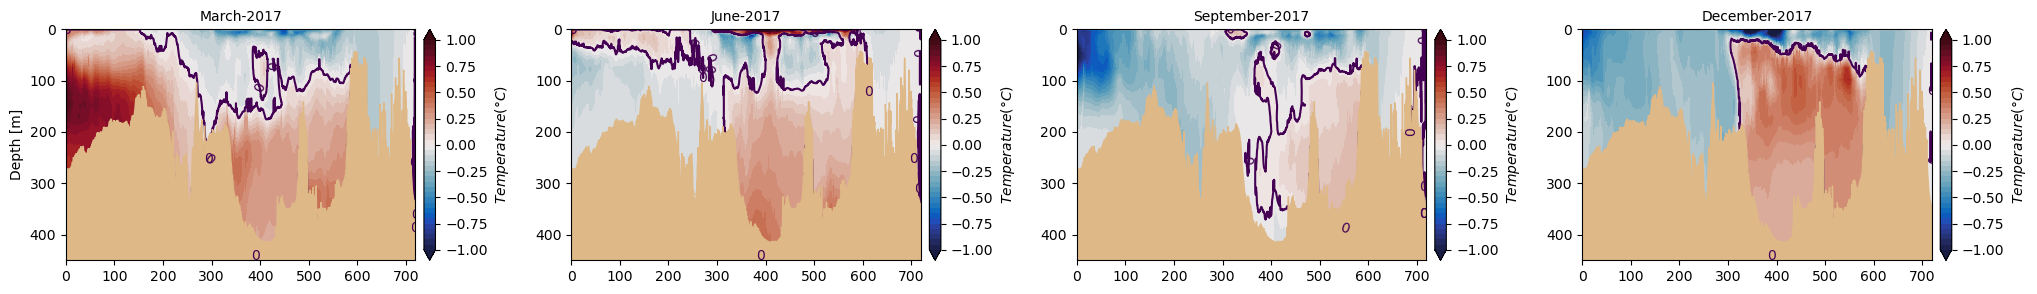

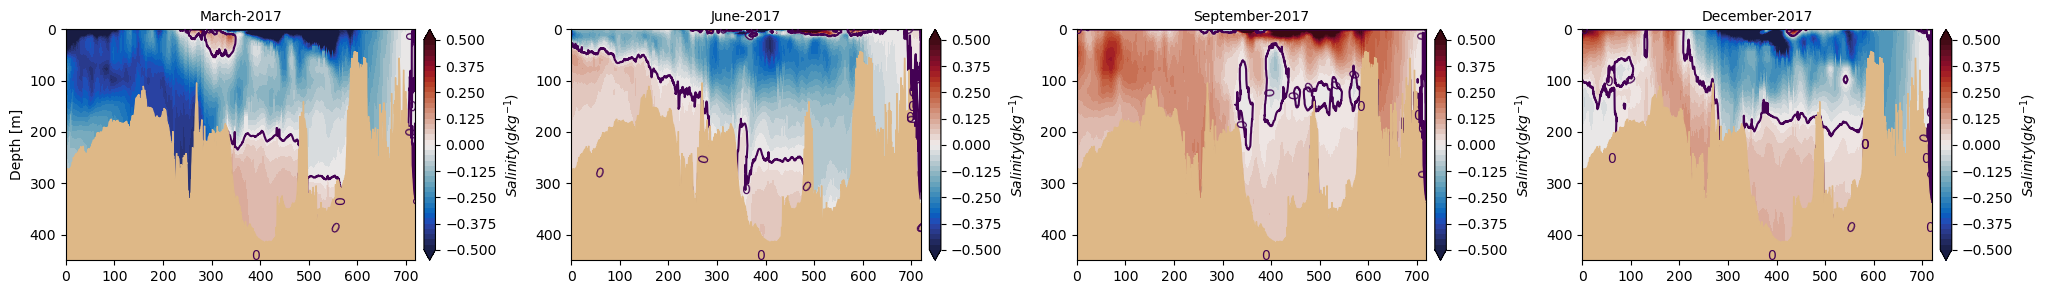

In [7]:
k, col, conv, nvar, nyear = (1, 4, 86400, 4, 3)
cmap=cm.balance
for i in range (nyear):
    if i==0:
        year=2015
    else:
        year=year+1
    ds_chemY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_chem_T_{year-1}1201_{year}1130.nc')
    ds_biolY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_biol_T_{year-1}1201_{year}1130.nc')
    ds_grdTY= xr.open_mfdataset(f'{dir}SalishSeaCast_1m_grid_T_{year-1}1201_{year}1130.nc')
    for tt in range(nvar):
        if tt==0:
            fig, ax = plt.subplots(1, col, figsize=(25, 3))
            var=ds_chemY.dissolved_oxygen-ds_chem_clim.dissolved_oxygen
            space=np.linspace(-40, 40, 41)
            cont=[0]
            label='$DO (mmolO_2m^{-3})$'
        elif tt==1:
            fig, ax = plt.subplots(1, col, figsize=(25, 3))
            var=ds_biolY.dissolved_organic_nitrogen-ds_biol_clim.dissolved_organic_nitrogen
            space=np.linspace(-0.25, 0.25, 41)
            label='$DON (mmolN m^{-3})$'
        #elif tt==2:
        #    fig, ax = plt.subplots(1, col, figsize=(18, 3))
        #    var=ds_biolY.particulate_organic_nitrogen-ds_biol_clim.particulate_organic_nitrogen
        #    space=np.linspace(-0.05, 0.05, 41)
        #    label='$PON (mmolN m^{-3})$'
        elif tt==2:
            fig, ax = plt.subplots(1, col, figsize=(25, 3))
            var=ds_grdTY.votemper-ds_grdT_clim.votemper
            space=np.linspace(-1, 1, 41)
            label='$Temperature (°C)$'
        elif tt==3:
            fig, ax = plt.subplots(1, col, figsize=(25, 3))
            var=ds_grdTY.vosaline-ds_grdT_clim.vosaline
            space=np.linspace(-0.5, 0.5, 41)
            label='$Salinity (g kg^{-1})$'
        for j in range(col):
            if j==0:
                mm=3
                title='March'
            elif j==1:
                mm=6
                title='June'
            elif j==2:
                mm=9
                title='September'
            else:
                mm=0
                title='December'
            dep_thal, distance, var_thal = vis.load_thalweg(depth[0, ...], np.array(var[mm,...]), bathy['nav_lon'][:], bathy['nav_lat'][:],thalweg)
            var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg)
            colours_var = ax[j].contourf(distance, dep_thal[:,:,0], var_plot, space, cmap=cmap, extend='both')
            colourc_var = ax[j].contour(distance, dep_thal[:,:,0], var_plot, cont, zorder=1)
            ax[j].clabel(colourc_var, inline=False)
            vis._add_bathy_patch(distance, bathy['Bathymetry'][:], thalweg, ax[j], color='burlywood')
            ax[j].invert_yaxis()
            ax[0].set_ylabel('Depth [m]');
            ax[j].set_ylim([450, 0])
            ax[j].set_title(f'{title}-{year}',fontsize=10)
            cbar = fig.colorbar(colours_var, ax=ax[j], pad=0.02)
            cbar.ax.set_ylabel(f'{label}',fontsize=10)
plt.show()